In [5]:
import pandas as pd

# Đọc file CSV
file_path = "G:/DATA/nv3/country_wise_latest.csv"  # Đường dẫn tới file CSV
df = pd.read_csv(file_path)

# Hiển thị dữ liệu
print(df)

     Unnamed: 0      Country/Region  Confirmed  Deaths  Recovered  New cases  \
0             0         Afghanistan      36263    1269      25198        106   
1             1             Albania       4880     144       2745        117   
2             2             Algeria      27973    1163      18837        616   
3             3             Andorra        907      52        803         10   
4             4              Angola        950      41        242         18   
..          ...                 ...        ...     ...        ...        ...   
182         182  West Bank and Gaza      10621      78       3752        152   
183         183      Western Sahara         10       1          8          0   
184         184               Yemen       1691     483        833         10   
185         185              Zambia       4552     140       2815         71   
186         186            Zimbabwe       2704      36        542        192   

     New deaths  New recovered  1 week 

In [7]:

import pandas as pd

# Đọc dữ liệu
file_path = "G:/DATA/nv3/country_wise_latest.csv"
data = pd.read_csv(file_path)

# Đổi tên cột 'Unnamed: 0' thành 'ID'
data = data.rename(columns={'Unnamed: 0': 'ID'})

# Lưu lại vào file CSV (ghi đè file cũ)
data.to_csv(file_path, index=False)

print("Cột 'Unnamed: 0' đã được đổi thành 'ID' và lưu lại trong file CSV.")


Cột 'Unnamed: 0' đã được đổi thành 'ID' và lưu lại trong file CSV.



Dữ liệu sau khi phân cụm:
              Country/Region  Cluster
0                Afghanistan        0
1                    Albania        0
2                    Algeria        0
3                    Andorra        0
4                     Angola        0
5        Antigua and Barbuda        0
6                  Argentina        0
7                    Armenia        0
8                  Australia        0
9                    Austria        0
10                Azerbaijan        0
11                   Bahamas        0
12                   Bahrain        0
13                Bangladesh        0
14                  Barbados        0
15                   Belarus        0
16                   Belgium        0
17                    Belize        0
18                     Benin        0
19                    Bhutan        0
20                   Bolivia        0
21    Bosnia and Herzegovina        0
22                  Botswana        0
23                    Brazil        1
24                    B

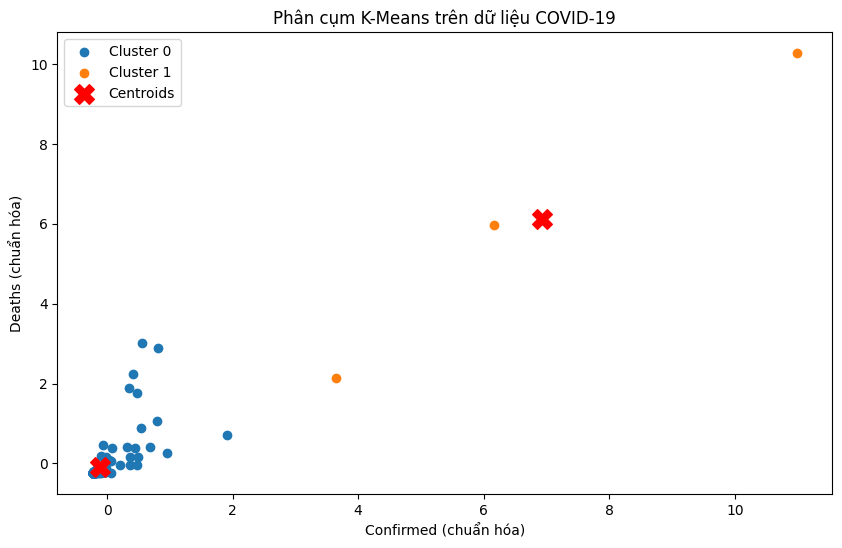

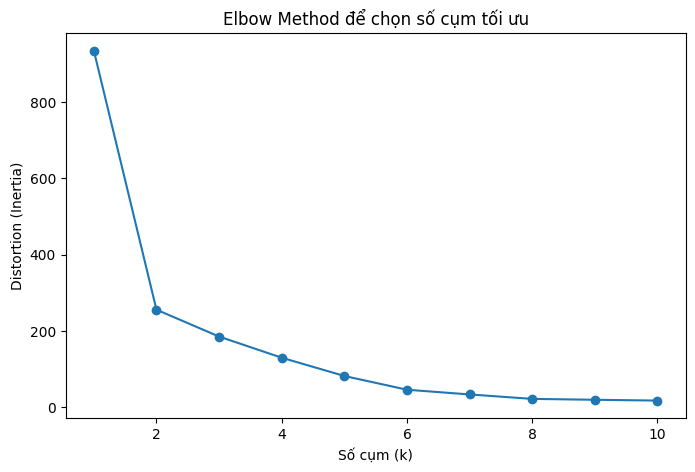

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Đọc dữ liệu
file_path = "G:/DATA/nv3/country_wise_latest.csv"
data = pd.read_csv(file_path)

# Chọn các cột số liệu và xử lý giá trị thiếu
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'New cases', 'New deaths']
data[numerical_features] = data[numerical_features].fillna(0)

# Chuẩn hóa dữ liệu
features = data[numerical_features].values
features = (features - features.mean(axis=0)) / features.std(axis=0)

# Khởi tạo số cụm (k) và sử dụng KMeans++
k = 2 # Bạn có thể điều chỉnh số cụm theo Elbow Method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=300)
clusters = kmeans.fit_predict(features)

# Thêm thông tin cụm vào dữ liệu ban đầu
data['Cluster'] = clusters

# Hiển thị thông tin phân cụm
print("\nDữ liệu sau khi phân cụm:")
print(data[['Country/Region', 'Cluster']].head(50))  # Hiển thị 100 dòng đầu tiên

# Hiển thị tâm cụm
print("\nTâm cụm cuối cùng:")
print(kmeans.cluster_centers_)

# Đánh giá mô hình bằng Silhouette Score
sil_score = silhouette_score(features, clusters)
print(f"\nSilhouette Score: {sil_score:.4f}")

# Trực quan hóa kết quả phân cụm (hai chiều: Confirmed và Deaths)
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(features[clusters == j, 0], features[clusters == j, 1], label=f"Cluster {j}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title("Phân cụm K-Means trên dữ liệu COVID-19")
plt.xlabel("Confirmed (chuẩn hóa)")
plt.ylabel("Deaths (chuẩn hóa)")
plt.legend()
plt.show()

# Sử dụng Elbow Method để chọn số cụm tối ưu (nếu cần)
distortions = []
for i in range(1, 11):
    kmeans_temp = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300)
    kmeans_temp.fit(features)
    distortions.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method để chọn số cụm tối ưu')
plt.show()

